In [1]:
from src.alien import  alien
from src.percolation import Graph
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
n=np.linspace(100, 1000, 1).astype(int)
r=np.linspace(0.18, 0.22, 8)
p=np.linspace(0.19, 0.21, 5)
percolation=Graph(100, n, r, p)
alien=alien()

os.makedirs("figs", exist_ok=True)

### MLP

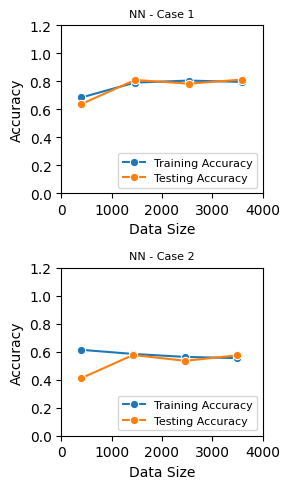

1.3165840798918613

In [2]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns


MLP_percolation,clf_percolation = percolation.evaluate(MLPClassifier(hidden_layer_sizes=(10,), activation='relu', alpha=0.01,solver='adam',tol=1e-5, max_iter=1000, random_state=19))
MLP_percolation_melted = MLP_percolation.melt('data_size', var_name='MLP', value_name='Accuracy')

MLP_alien,clf_alien = alien.evaluate(MLPClassifier(hidden_layer_sizes=(10,), activation='relu',alpha=0.01, solver='adam',tol=1e-4, max_iter=1000, random_state=19))
MLP_alien_melted = MLP_alien.melt('data_size', var_name='MLP', value_name='Accuracy')

fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 

ax1=fig.add_subplot(2,1,1)
sns.lineplot(data=MLP_percolation_melted, x='data_size', y='Accuracy', hue='MLP', marker='o')
ax2=fig.add_subplot(2,1,2)
sns.lineplot(data=MLP_alien_melted, x='data_size', y='Accuracy', hue='MLP', marker='o')


plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})



ax1.set_xlabel('Data Size')
ax2.set_xlabel('Data Size')

ax1.set_ylim(0, 1.2)
ax1.set_xlim(0, 4000)
ax2.set_ylim(0, 1.2)
ax2.set_xlim(0, 4000)
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
ax1.set_title('NN - Case 1')
ax2.set_title('NN - Case 2')

plt.tight_layout() 
plt.savefig('figs/neural_network.pdf')
plt.show()


(MLP_percolation_melted["Accuracy"].mean()+MLP_alien_melted["Accuracy"].mean())


### MLP loss

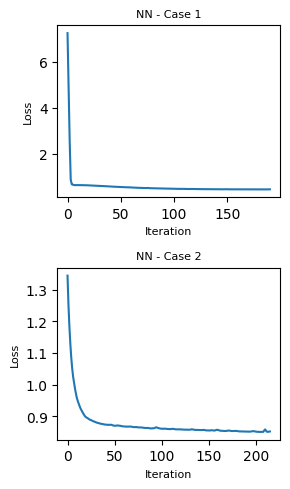

In [3]:
fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 


ax1=fig.add_subplot(2,1,1)
plt.plot(clf_percolation.loss_curve_)
ax2=fig.add_subplot(2,1,2)
plt.plot(clf_alien.loss_curve_)


plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})



ax1.set_xlabel('Iteration')
ax2.set_xlabel('Iteration')


ax1.set_ylabel('Loss')
ax2.set_ylabel('Loss')

# ax1.set_ylim(0, 1.)
# ax1.set_xlim(0, 4000)
# ax2.set_ylim(0, 1.)
# ax2.set_xlim(0, 3000)
# ax1.legend(loc='lower right')
# ax2.legend(loc='lower right')
ax1.set_title('NN - Case 1')
ax2.set_title('NN - Case 2')

plt.tight_layout() 
plt.savefig('figs/loss.pdf')
plt.show()


### MLP hyperparameters

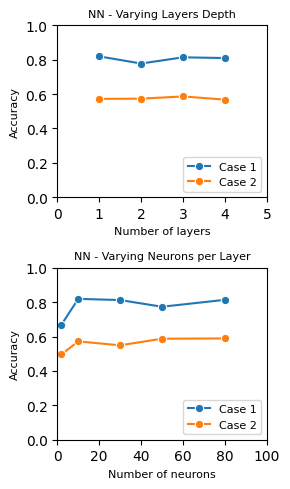

In [4]:
layers=[(10),(10,10),(10,10,10),(10,10,10,10)]
accuracy1=[]
accuracy2=[]
for layer in layers:
    acc1,_ = percolation.evaluate(MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=1000, random_state=19),ratio_range=np.array([0.1]))
    acc2,_ = alien.evaluate(MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=1000, random_state=19),ratio_range=np.array([0.1]))

    # acc,_ =  percolation.evaluate(MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=1000, random_state=19),ratio_range=[0.1])
    accuracy1.append(acc1['Testing Accuracy'].mean())
    accuracy2.append(acc2['Testing Accuracy'].mean())

neurons=[2,10,30,50,80]
accuracy3=[]
accuracy4=[]
for n in neurons:
    acc3,_ = percolation.evaluate(MLPClassifier(hidden_layer_sizes=(n), activation='relu', solver='adam', max_iter=1000, random_state=19),ratio_range=np.array([0.1]))
    acc4,_ = alien.evaluate(MLPClassifier(hidden_layer_sizes=(n), activation='relu', solver='adam', max_iter=1000, random_state=19),ratio_range=np.array([0.1]))

    # acc,_ =  percolation.evaluate(MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=1000, random_state=19),ratio_range=[0.1])
    accuracy3.append(acc3['Testing Accuracy'].mean())
    accuracy4.append(acc4['Testing Accuracy'].mean())

fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 

ax1=fig.add_subplot(2,1,1)
sns.lineplot(x=np.array([1,2,3,4]),y=accuracy1, marker='o', label='Case 1')
sns.lineplot(x=np.array([1,2,3,4]),y=accuracy2, marker='o', label='Case 2')

ax2=fig.add_subplot(2,1,2)
sns.lineplot(x=neurons,y=accuracy3, marker='o',label='Case 1')
sns.lineplot(x=neurons,y=accuracy4, marker='o',label='Case 2')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})


ax1.set_ylim(0, 1)
ax1.set_xlim(0, 5)
ax2.set_ylim(0., 1)
ax2.set_xlim(0, 100)

ax1.set_xlabel('Number of layers')
ax1.set_ylabel('Accuracy')

ax2.set_xlabel('Number of neurons')
ax2.set_ylabel('Accuracy')

ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
ax1.set_title('NN - Varying Layers Depth')
ax2.set_title('NN - Varying Neurons per Layer')

plt.tight_layout()

plt.savefig('figs/hyperparameter.pdf')
plt.show()

### SVM

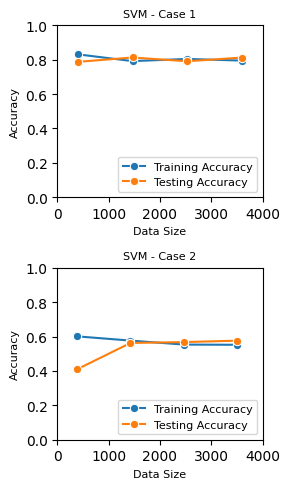

1.35343877535255

In [5]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


SVM_percolation,_ = percolation.evaluate(SVC(kernel='linear', random_state=19))
SVM_percolation_melted = SVM_percolation.melt('data_size', var_name='SVM', value_name='Accuracy')

SVM_alien,_ = alien.evaluate(SVC(kernel='linear', random_state=19))
SVM_alien_melted = SVM_alien.melt('data_size', var_name='SVM', value_name='Accuracy')

fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 

ax1=fig.add_subplot(2,1,1)
sns.lineplot(data=SVM_percolation_melted, x='data_size', y='Accuracy', hue='SVM', marker='o')
ax2=fig.add_subplot(2,1,2)
sns.lineplot(data=SVM_alien_melted, x='data_size', y='Accuracy', hue='SVM', marker='o')


plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})



ax1.set_xlabel('Data Size')
ax2.set_xlabel('Data Size')

ax1.set_ylim(0, 1.)
ax1.set_xlim(0, 4000)
ax2.set_ylim(0, 1.)
ax2.set_xlim(0, 4000)
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
ax1.set_title('SVM - Case 1')
ax2.set_title('SVM - Case 2')

plt.tight_layout()
plt.savefig('figs/svm.pdf')
plt.show()





(SVM_percolation_melted["Accuracy"].mean()+SVM_alien_melted["Accuracy"].mean())

### svm hyperparameter

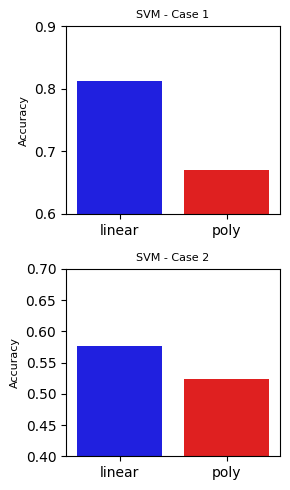

In [6]:
kernels=['linear','poly']
accuracy_svm_1=[]
accuracy_svm_2=[]
for ke in kernels:
    acc1,_ = percolation.evaluate(SVC(kernel=ke, random_state=19),ratio_range=np.array([0.1]))
    acc2,_ = alien.evaluate(SVC(kernel=ke, random_state=19),ratio_range=np.array([0.1]))

    # acc,_ =  percolation.evaluate(MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=1000, random_state=19),ratio_range=[0.1])
    accuracy_svm_1.append(acc1['Testing Accuracy'].mean())
    accuracy_svm_2.append(acc2['Testing Accuracy'].mean())



fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 


colors = ['blue',  'red']

ax1=fig.add_subplot(2,1,1)
sns.barplot(x=kernels,y=accuracy_svm_1,palette=colors)
ax2=fig.add_subplot(2,1,2)
sns.barplot(x=kernels,y=accuracy_svm_2,palette=colors)

# ax2=fig.add_subplot(1,2,2)
# sns.lineplot(x=neurons,y=accuracy3, marker='o',label='Case 1')
# sns.lineplot(x=neurons,y=accuracy4, marker='o',label='Case 2')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})


ax1.set_ylim(0.6, 0.9)
# ax1.set_xlim(0, 5)
ax2.set_ylim(0.4, 0.7)
# ax2.set_xlim(0, 60)

# ax1.set_xlabel('Number of layers')
ax1.set_ylabel('Accuracy')

# ax2.set_xlabel('Number of neurons')
ax2.set_ylabel('Accuracy')

# ax1.legend(loc='lower right')
# ax2.legend(loc='lower right')
ax1.set_title('SVM - Case 1')
ax2.set_title('SVM - Case 2')

plt.tight_layout()

plt.savefig('figs/svn_hyperparameter.pdf')
plt.show()

In [7]:
accuracy_svm_2[0]/accuracy_svm_2[1]-1

0.10081743869209814

### KNN

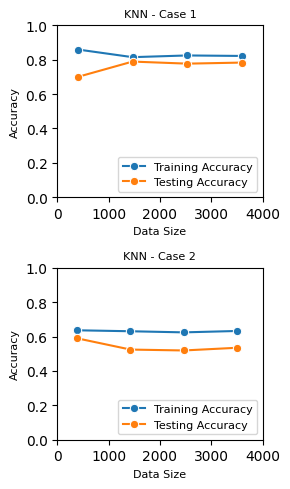

1.3829688990436861

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

n=10

KNN_percolation,_ = percolation.evaluate(KNeighborsClassifier(n_neighbors=n))
KNN_percolation_melted = KNN_percolation.melt('data_size', var_name='KNN', value_name='Accuracy')

KNN_alien,_ = alien.evaluate(KNeighborsClassifier(n_neighbors=n))
KNN_alien_melted = KNN_alien.melt('data_size', var_name='KNN', value_name='Accuracy')

fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 

ax1=fig.add_subplot(2,1,1)
sns.lineplot(data=KNN_percolation_melted, x='data_size', y='Accuracy', hue='KNN', marker='o')
ax2=fig.add_subplot(2,1,2)
sns.lineplot(data=KNN_alien_melted, x='data_size', y='Accuracy', hue='KNN', marker='o')


plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})



ax1.set_xlabel('Data Size')
ax2.set_xlabel('Data Size')

ax1.set_ylim(0, 1.)
ax1.set_xlim(0, 4000)
ax2.set_ylim(0, 1.)
ax2.set_xlim(0, 4000)
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
ax1.set_title('KNN - Case 1')
ax2.set_title('KNN - Case 2')

plt.tight_layout()
plt.savefig('figs/knn.pdf')
plt.show()


(KNN_percolation_melted["Accuracy"].mean()+KNN_alien_melted["Accuracy"].mean())


### hypothesis about percolation datasets

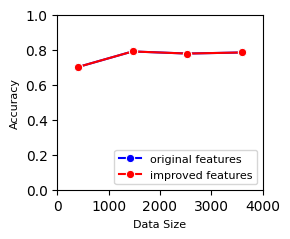

1.3829688990436861

In [9]:

n=10

KNN_percolation2,_ = percolation.evaluate(KNeighborsClassifier(n_neighbors=n),modify_feature=True)
KNN_alien2,_ = alien.evaluate(KNeighborsClassifier(n_neighbors=n),modify_feature=True)


temp1=KNN_percolation[["data_size","Testing Accuracy"]]
temp1_melted = temp1.melt('data_size', var_name='KNN', value_name='Accuracy')

temp2=KNN_percolation2[["data_size","Testing Accuracy"]]
temp2=temp2.rename(columns={"Testing Accuracy":"Testing Accuracy - modified feature"})
temp2_melted = temp2.melt('data_size', var_name='KNN', value_name='Accuracy')

temp3=KNN_alien[["data_size","Testing Accuracy"]]
temp3_melted = temp3.melt('data_size', var_name='KNN', value_name='Accuracy')

temp4=KNN_alien2[["data_size","Testing Accuracy"]]
temp4=temp4.rename(columns={"Testing Accuracy":"Testing Accuracy - modified feature"})
temp4_melted = temp4.melt('data_size', var_name='KNN', value_name='Accuracy')

fig = plt.figure(figsize=(3,2.5))
plt.subplots_adjust(wspace=2) 

ax1=fig.add_subplot(1,1,1)
sns.lineplot(data=temp1_melted, x='data_size', y='Accuracy',  marker='o',color='blue',label='original features')
# ax2=fig.add_subplot(2,1,2)
sns.lineplot(data=temp2_melted, x='data_size', y='Accuracy',  marker='o',color = 'red',label='improved features')


# ax1=fig.add_subplot(2,1,2)
# sns.lineplot(data=temp3_melted, x='data_size', y='Accuracy',  marker='o',color='blue',label='original features')
# # ax2=fig.add_subplot(2,1,2)
# sns.lineplot(data=temp4_melted, x='data_size', y='Accuracy',  marker='o',color = 'red',label='improved features')


plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})



ax1.set_xlabel('Data Size')
ax2.set_xlabel('Data Size')

ax1.set_ylim(0, 1.)
ax1.set_xlim(0, 4000)
ax2.set_ylim(0, 1.)
ax2.set_xlim(0, 4000)
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
# ax1.set_title('KNN - Case 1')
# ax2.set_title('KNN - Case 2')

plt.tight_layout()
# plt.savefig('hypothesis1.pdf')
plt.show()


(KNN_percolation_melted["Accuracy"].mean()+KNN_alien_melted["Accuracy"].mean())


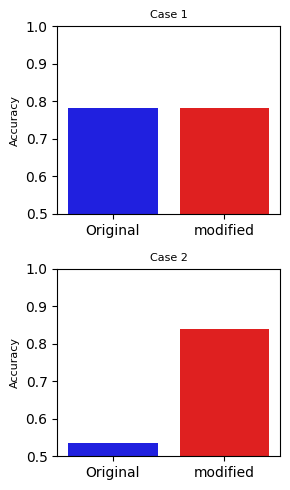

In [10]:
kernels=['Original','modified']
accuracy_modified_1=[temp1_melted.iloc[-1,-1],temp2_melted.iloc[-1,-1]]
accuracy_modified_2=[temp3_melted.iloc[-1,-1],temp4_melted.iloc[-1,-1]]




fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 

colors = ['blue',  'red']

ax1=fig.add_subplot(2,1,1)
sns.barplot(x=kernels,y=accuracy_modified_1,palette=colors)
ax2=fig.add_subplot(2,1,2)
sns.barplot(x=kernels,y=accuracy_modified_2,palette=colors)

# ax2=fig.add_subplot(1,2,2)
# sns.lineplot(x=neurons,y=accuracy3, marker='o',label='Case 1')
# sns.lineplot(x=neurons,y=accuracy4, marker='o',label='Case 2')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})


ax1.set_ylim(0.5, 1)
# ax1.set_xlim(0, 5)
ax2.set_ylim(0.5, 1)
# ax2.set_xlim(0, 60)

# ax1.set_xlabel('Number of layers')
ax1.set_ylabel('Accuracy')

# ax2.set_xlabel('Number of neurons')
ax2.set_ylabel('Accuracy')

# ax1.legend(loc='lower right')
# ax2.legend(loc='lower right')
ax1.set_title('Case 1')
ax2.set_title('Case 2')

plt.tight_layout()

plt.savefig('figs/hypothesis.pdf')
plt.show()

### KNN hyperparameters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


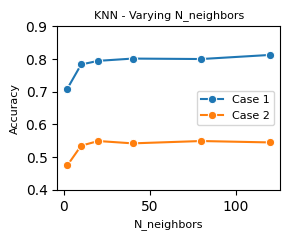

In [11]:


neurons=[2,10,20,40,80,120]
knn_accuracy_1=[]
knn_accuracy_2=[]
for n in neurons:
    acc3,_ = percolation.evaluate((KNeighborsClassifier(n_neighbors=n)),ratio_range=np.array([0.1]))
    acc4,_ = alien.evaluate((KNeighborsClassifier(n_neighbors=n)),ratio_range=np.array([0.1]))

    # acc,_ =  percolation.evaluate(MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=1000, random_state=19),ratio_range=[0.1])
    knn_accuracy_1.append(acc3['Testing Accuracy'].mean())
    knn_accuracy_2.append(acc4['Testing Accuracy'].mean())

fig = plt.figure(figsize=(3,2.5))
# plt.subplots_adjust(wspace=0.6) 

ax1=fig.add_subplot(1,1,1)
sns.lineplot(x=neurons,y=knn_accuracy_1, marker='o', label='Case 1')
sns.lineplot(x=neurons,y=knn_accuracy_2, marker='o', label='Case 2')

# ax2=fig.add_subplot(1,2,2)
# sns.lineplot(x=neurons,y=accuracy3, marker='o',label='Case 1')
# sns.lineplot(x=neurons,y=accuracy4, marker='o',label='Case 2')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})


ax1.set_ylim(0.4, 0.9)
# ax1.set_xlim(0, 5)
# ax2.set_ylim(0., 1)
# ax2.set_xlim(0, 60)

ax1.set_xlabel('N_neighbors')
ax1.set_ylabel('Accuracy')

ax2.set_xlabel('Number of neurons')
ax2.set_ylabel('Accuracy')

ax1.legend(loc='center right')
ax2.legend(loc='lower right')
ax1.set_title('KNN - Varying N_neighbors')
ax2.set_title('NN - Varying Neurons per Layer')

plt.tight_layout()

plt.savefig('figs/knn_hyperparameter.pdf')
plt.show()

### performance comparison

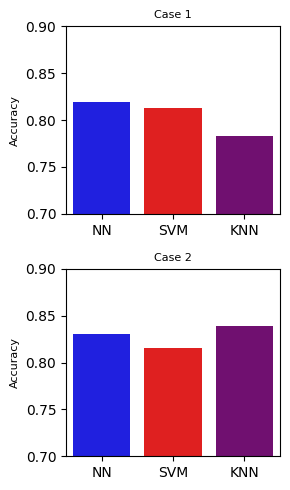

In [12]:
import time

clfs=[MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=19), SVC(kernel='linear', random_state=19),KNeighborsClassifier(n_neighbors=10)]
clf_name=["NN","SVM","KNN"]
accuracy_clf_1=[]
time_clf_1=[]
accuracy_clf_2=[]
time_clf_2=[]
for model in clfs:
    start_time = time.time()
    acc1,_ = percolation.evaluate(model,ratio_range=np.array([0.1]),modify_feature=True)
    end_time = time.time()
    time_clf_1.append(end_time-start_time)

    start_time = time.time()
    acc2,_ = alien.evaluate(model,ratio_range=np.array([0.1]),modify_feature=True)
    end_time = time.time()
    time_clf_2.append(end_time-start_time)

    # acc,_ =  percolation.evaluate(MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=1000, random_state=19),ratio_range=[0.1])
    accuracy_clf_1.append(acc1['Testing Accuracy'].mean())
    accuracy_clf_2.append(acc2['Testing Accuracy'].mean())



fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 


colors = ['blue', 'red','purple']

ax1=fig.add_subplot(2,1,1)
sns.barplot(x=clf_name,y=accuracy_clf_1,palette=colors)
ax2=fig.add_subplot(2,1,2)
sns.barplot(x=clf_name,y=accuracy_clf_2,palette=colors)

# ax2=fig.add_subplot(1,2,2)
# sns.lineplot(x=neurons,y=accuracy3, marker='o',label='Case 1')
# sns.lineplot(x=neurons,y=accuracy4, marker='o',label='Case 2')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})


ax1.set_ylim(0.7, 0.9)
# ax1.set_xlim(0, 5)
ax2.set_ylim(0.7, 0.9)
# ax2.set_xlim(0, 60)

# ax1.set_xlabel('Number of layers')
ax1.set_ylabel('Accuracy')

# ax2.set_xlabel('Number of neurons')
ax2.set_ylabel('Accuracy')

# ax1.legend(loc='lower right')
# ax2.legend(loc='lower right')
ax1.set_title('Case 1')
ax2.set_title('Case 2')

plt.tight_layout()

plt.savefig('figs/comp_accuracy.pdf')
plt.show()

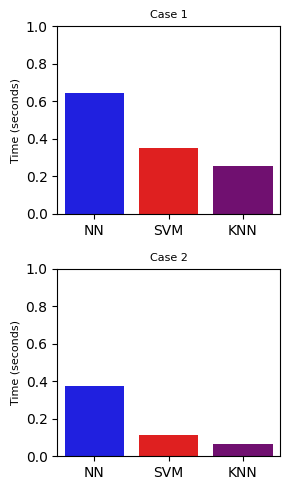

In [13]:
fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 


colors = ['blue', 'red','purple']

ax1=fig.add_subplot(2,1,1)
sns.barplot(x=clf_name,y=time_clf_1,palette=colors)
ax2=fig.add_subplot(2,1,2)
sns.barplot(x=clf_name,y=time_clf_2,palette=colors)

# ax2=fig.add_subplot(1,2,2)
# sns.lineplot(x=neurons,y=accuracy3, marker='o',label='Case 1')
# sns.lineplot(x=neurons,y=accuracy4, marker='o',label='Case 2')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})


ax1.set_ylim(0., 1)
# ax1.set_xlim(0, 5)
ax2.set_ylim(0., 1)
# ax2.set_xlim(0, 60)

# ax1.set_xlabel('Number of layers')
ax1.set_ylabel('Time (seconds)')

# ax2.set_xlabel('Number of neurons')
ax2.set_ylabel('Time (seconds)')

# ax1.legend(loc='lower right')
# ax2.legend(loc='lower right')
ax1.set_title('Case 1')
ax2.set_title('Case 2')

plt.tight_layout()

plt.savefig('figs/comp_time.pdf')
plt.show()